![](image/LambdaSchool.png)

# Introduction to Natural Language Processing

### Details
* <b> Event: </b> Lambda School Guest Lecture
* <b> Instructor: </b> Bruno Janota, Senior Data Scientist at Lockheed Martin
* <b> Date: </b> Monday, June 17th, 2019

### Sections
1. [Representing Text as Numbers](#1.-Representing-Text-as-Numbers)
2. [LDA Topic Modeling](#2.-LDA-Topic-Modeling)
3. [Next Steps](#3.-Next-Steps)

# 1. Representing Text as Numbers

In order for a computer to execute any form of analytics or machine learning on natural language, data scientists must convert the raw text that we as humans can comprehend into a format that computers can understand.  That format is a numeric representation.

The first task in any Natural Language Processing analysis is to parse the raw text into objects called tokens. This process is called <b>tokenization</b>. The result of tokenization is a list of words that represents each text input (document, tweet, etc.) in a dataset. 

Let's tokenize an example dataset of generic sentences. Feel free to experiment with your own sentence. For this task, we will use a python package developed by NLP researchers at Stanford called `NLTK` which stands for Natural Language ToolKit.

In [1]:
# Import the nltk package
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Experiment with your own sentence and observe the tokens
sentence = "I will be an NLP guru by the end of lunch today."
tokens = nltk.word_tokenize(sentence)
print(f"'{sentence}' becomes\n{tokens}")

'I will be an NLP guru by the end of lunch today.' becomes
['I', 'will', 'be', 'an', 'NLP', 'guru', 'by', 'the', 'end', 'of', 'lunch', 'today', '.']


### 1.1 Term Frequency & Text Pre-Processing

Once the raw text has been tokenized, one of the simplest ways to represent the tokenized data in numeric form is to compute the number of occurences of a word in the text, more commonly known as the <b>term frequency</b>.  This approach takes the tokens and counts the number of occurences for each within the tokenized text.

Luckily, there are many pre-built options in Python for performing this task. We will use Scikit-Learn's `CountVectorizer` function to calculate the term frequencies. Scikit-Learn is one of the industry standard Python packages for analytics.

Lets calculate the term frequency over a list of sentences. We can provide the list of raw text to the `CountVectorizer` function and use its default tokenizer, or pass the `NLTK` tokenizer as an argument.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sentences = [
    "I like this movie, very funny",
    "I hate all movies.",
    "Movie was awesome! I loved it.",
    "Good movie. I love it."
]

tf_vectorizer = CountVectorizer(lowercase=False)
X = tf_vectorizer.fit_transform(sentences)

tf_df = pd.DataFrame(data = X.toarray(), columns = tf_vectorizer.get_feature_names())
print(f'Number of sentences: {tf_df.shape[0]}\nNumber of tokens: {tf_df.shape[1]}\n')
tf_df

Number of sentences: 4
Number of tokens: 15



,Good,Movie,all,awesome,funny,hate,it,like,love,loved,movie,movies,this,very,was
0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0


This table shows us how term frequency works. Each row is a sentence in our `sentences` list, and the columns represent the unique word counts across the dataset.

<i>Does anything odd stand out to you about the tokens themselves?</i>

These nuances are common problems associated with Natural Language Processing tasks but luckily there are several well documented aproaches and general NLP best practices to these problems that we will discuss in more detail below:
- Stop Word Removal
- Lowercasing text
- Stemming (rules based hueristic approach to convert words into their stem)
- Lemmatization (utilizes pre-determined vocabulary and morphological analysis of words to return the base form of a word)

Let's repeat the tokenization process above by using a different tokenizer than the default within `CountVectorizer`, converting tokens to lowercase, remove stop words, and observing the resulting term frequency table.

#### Stop Word Removal

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Pythons NaturaL Lanugage Tool Kit (NLTK) package contains a list of 179 commonly used english words that do not have much value in helping to understand or extract meaning from text. It is usually a good starting point but can be easily extended for text in specific domains (social media, emails, surveys, etc.). 

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

print('Number of Stop Words: {}'.format(len(stop_words)))
print('Example Stop Words: {}'.format(stop_words[0:20]))

Number of Stop Words: 179
Example Stop Words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
# Experiment with your own sentence and observe the tokens
sentence = "I will be an NLP guru by the end of lunch today."
tokens = nltk.word_tokenize(sentence)
tokens_no_stop = [word for word in tokens if word not in stop_words]
print(f"Tokenized sentence: '{tokens}")
print(f"Tokenized sentence without stop words: '{tokens_no_stop}'")

Tokenized sentence: '['I', 'will', 'be', 'an', 'NLP', 'guru', 'by', 'the', 'end', 'of', 'lunch', 'today', '.']
Tokenized sentence without stop words: '['I', 'NLP', 'guru', 'end', 'lunch', 'today', '.']'


#### Lowercasing Text

Let's tokenize the same sentences as above removing stop words and lowercasing words.

In [7]:
tf_vectorizer = CountVectorizer(lowercase=True, stop_words=stop_words)
X = tf_vectorizer.fit_transform(sentences)

tf_df = pd.DataFrame(data = X.toarray(), columns = tf_vectorizer.get_feature_names())
print(f'Number of sentences: {tf_df.shape[0]}\nNumber of tokens: {tf_df.shape[1]}\n')
tf_df

Number of sentences: 4
Number of tokens: 9



,awesome,funny,good,hate,like,love,loved,movie,movies
0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0
3,0,0,1,0,0,1,0,1,0


This is great! We have reduced the sentences down to the most relevant words but there is still some duplication such as "movie" and "movies" and "love" and "loved".

#### Lemmatization and Stemming

In [8]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Experiment with your own sentence and observe the tokens
sentence = "The movies were awesome! I loved it." 

# Initialize Common Lemmatizers/Stemmers
wnl = WordNetLemmatizer()
ps = PorterStemmer()

# Compare WordNetLemmatizer and PorterStemmer
tokens = nltk.word_tokenize(sentence)
tokens_wnl = [wnl.lemmatize(t) for t in nltk.word_tokenize(sentence)]
tokens_ps = [ps.stem(t) for t in nltk.word_tokenize(sentence)]
print(f"Tokenized sentence: \n{tokens}")
print(f"Tokenized sentence with WordNetLemmatizer: \n{tokens_wnl}'")
print(f"Tokenized sentence with PorterStemmer: \n{tokens_ps}'")

Tokenized sentence: 
['The', 'movies', 'were', 'awesome', '!', 'I', 'loved', 'it', '.']
Tokenized sentence with WordNetLemmatizer: 
['The', 'movie', 'were', 'awesome', '!', 'I', 'loved', 'it', '.']'
Tokenized sentence with PorterStemmer: 
['the', 'movi', 'were', 'awesom', '!', 'I', 'love', 'it', '.']'


In addition to the methods discussed above there are also python functions to remove punctuation.

In [10]:
# Import necessary packages
import string

# Remove the punctuation from our sentences
sentences_no_punc = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences]

# Examine sentences_no_punc
sentences_no_punc

['I like this movie very funny',
 'I hate all movies',
 'Movie was awesome I loved it',
 'Good movie I love it']

### Spell Check/Autocorrect

Lastly, depending on the dataset you may want to autocorrect the text to catch misspellings (social media or other user generated text data).

In [11]:
from autocorrect import spell

word = 'mussage'
print(f'Original Spelling: {word}')
print(f'Autocorrect: {spell(word)}')

Original Spelling: mussage
Autocorrect: message


There are many pre-built packages in python that can help you transform and pre-process text data. This section introduced you to several of the common best practice text cleaning options. When there doesnt exist a pre-built option, it is fairly straightforward to build your own!

### 1.2 Term Frequency - Inverse Document Frequency (TF-IDF)

While term frequency is a great way to represent text in a numeric fashion, there are more advanced methods that capture information about the entire dataset. <b>Term Frequency-Inverse Document Frequency</b>, better known as <b>TF-IDF</b>, is another common, more advanced iteration of term frequency, and can be used to better represent text in relation to the entire dataset of text.

TF-IDF uses a calculation to determine a term's importance within the entire dataset. In easy to understand language, if a term occurs frequently in observation of the dataset, referred to a document, and doesn't occur frequently in other documents in the dataset, it should be given a higher numeric value. It is given a higher numeric value because it is unique to the identification of the document that it exists in. Terms that are common across most or all of the documents in the dataset in turn are given lower numeric values, because they don't help distinguish one document from another.

If you are interested in the math behind TF-IDF, it can be found [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

Lets use the same simple example as above to better visualize this numeric representation. We will use the `LemmaTokenizer` we created above to perform the tokenization and lemmatization, with one additional feature; we will remove punctuation as well!

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in nltk.word_tokenize(articles)]

# Initialize TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(),
                                   lowercase=True)

# Fit to sentences_no_punc and transform into array
X = tfidf_vectorizer.fit_transform(sentences_no_punc)

tfidf_df = pd.DataFrame(data = X.toarray(), columns = tfidf_vectorizer.get_feature_names()).round(3)
tfidf_df

,all,awesome,funny,good,hate,i,it,like,love,loved,movie,this,very,wa
0,0.000,0.00,0.469,0.000,0.000,0.245,0.000,0.469,0.000,0.00,0.245,0.469,0.469,0.00
1,0.627,0.00,0.000,0.000,0.627,0.327,0.000,0.000,0.000,0.00,0.327,0.000,0.000,0.00
2,0.000,0.49,0.000,0.000,0.000,0.256,0.386,0.000,0.000,0.49,0.256,0.000,0.000,0.49
3,0.000,0.00,0.000,0.562,0.000,0.293,0.443,0.000,0.562,0.00,0.293,0.000,0.000,0.00


Fantastic!

TF-IDF is the most common form of converting documents within a dataset, also known as corpus, into a numeric representation.  Now that we know how to preprocess raw text for modeling, lets learn about some different types of models and use some real-life data!

# 2. Topic Modeling

A topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

### Load MLB Pitcher Data
#### Career Statistics, Pitch Style Description and Tommy John Surgery Indicator

In this section, we will explore a dataset that contains career level data and pitch style descriptions for 758 MLB starting pitchers that threw more than 100 innings between 2010-2018 as well as an indication of whether or not the pitcher got Ulnar Collateral Ligament Reconstruction commonly referred to as Tommy John Surgery. 
- The career statistics were exported from Fangraphs.com
- Pitch style descriptions were scraped from BrooksBaseball.net player cards
- TJ Surgery indicator was merged from google sheet maintained by @MLBPlayerAnalysis

In [13]:
import pandas as pd

# Read Career Statistics from FanGraphs and TJ Surgery Data with Pitch Style
fg_df = pd.read_csv('./data/FanGraphsCareerData.csv')
tj_df = pd.read_csv('./data/MLB_Pitchers_2008to2018_withBBPitchStyle.csv')
print(f'FanGraphs Dataframe Shape: {fg_df.shape}')
print(f'TJ Dataframe Shape: {tj_df.shape}')

FanGraphs Dataframe Shape: (849, 45)
TJ Dataframe Shape: (795, 5)


In [14]:
# Merge Final dataframe with TJ label and FanGraphs Stats
df = pd.merge(tj_df, fg_df, on='playerid')
print(f'Final Dataframe Shape: {df.shape}\n')
df.head()

Final Dataframe Shape: (758, 49)



,playerid,Name_x,throws,BB_PitchStyle,tjSurgery,Name_y,Team,IP,Swing%,Contact%,...,CH-X,SL-X,CU-X,FA-Z,FC-Z,FS-Z,SI-Z,CH-Z,SL-Z,CU-Z
0,13172,Carson Smith,R,Although he has not thrown an MLB pitch in 201...,Yes,Carson Smith,- - -,102.0,0.405,0.711,...,-7.5,6.1,NaN,4.1,NaN,NaN,0.9,-2.0,-1.7,NaN
1,7196,Greg Holland,R,"Greg Holland has thrown 7,718 pitches that hav...",Yes,Greg Holland,- - -,423.1,0.459,0.672,...,NaN,2.6,2.7,10.9,NaN,3.3,NaN,NaN,0.5,-5.7
2,10745,Trevor Rosenthal,R,"Trevor Rosenthal has thrown 6,424 pitches that...",Yes,Trevor Rosenthal,Cardinals,325.0,0.492,0.732,...,-6.6,3.2,4.9,10.4,NaN,NaN,NaN,6.9,1.0,-4.7
3,15010,Corey Knebel,R,Although he has not thrown an MLB pitch in 201...,Yes,Corey Knebel,- - -,223.0,0.440,0.730,...,-8.4,NaN,5.7,10.2,NaN,NaN,NaN,5.4,NaN,-8.7
4,2520,Lance Lynn,R,"Lance Lynn has thrown 21,120 pitches that have...",Yes,Lance Lynn,- - -,1134.1,0.457,0.795,...,-6.7,NaN,5.5,8.1,3.3,NaN,3.6,2.7,NaN,-5.9


In [15]:
df.describe()

,playerid,IP,Swing%,Contact%,Zone%,Pace,K/9,BB/9,K/BB,HR/9,...,CH-X,SL-X,CU-X,FA-Z,FC-Z,FS-Z,SI-Z,CH-Z,SL-Z,CU-Z
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,...,691.000000,650.000000,583.000000,744.000000,355.000000,120.000000,650.000000,691.000000,650.000000,583.000000
mean,8241.166227,435.541425,0.462650,0.783538,0.486613,23.534433,7.958496,3.255475,2.586953,1.044710,...,-2.872214,1.640923,2.752659,8.967339,5.037183,3.000833,6.141538,4.743849,1.108308,-4.989708
std,4606.771033,369.937147,0.024252,0.042044,0.031358,1.989441,1.718047,0.827609,0.838824,0.312633,...,7.061158,2.810560,4.345372,1.498827,1.678132,1.828233,2.056685,2.317276,1.924770,2.556220
min,18.000000,100.000000,0.383000,0.638000,0.367000,18.500000,3.840000,1.240000,0.960000,0.260000,...,-10.800000,-7.500000,-9.200000,-5.500000,0.100000,-2.500000,-6.200000,-8.500000,-6.900000,-12.400000
25%,4300.250000,175.050000,0.447000,0.758000,0.467250,22.100000,6.795000,2.680000,2.040000,0.840000,...,-7.900000,0.100000,-0.400000,8.200000,3.900000,1.800000,5.100000,3.400000,-0.100000,-6.800000
50%,7944.500000,300.100000,0.462000,0.785000,0.488000,23.400000,7.905000,3.235000,2.440000,1.020000,...,-6.500000,1.900000,4.100000,9.100000,5.000000,3.050000,6.400000,4.900000,1.200000,-5.000000
75%,11891.000000,535.200000,0.478000,0.812750,0.507000,24.700000,9.000000,3.750000,2.970000,1.217500,...,6.100000,3.175000,5.900000,10.000000,6.100000,4.300000,7.500000,6.200000,2.400000,-3.200000
max,19427.000000,1919.000000,0.560000,0.891000,0.587000,31.200000,15.000000,6.520000,7.940000,2.260000,...,12.500000,10.300000,11.500000,12.300000,11.600000,7.400000,11.500000,10.700000,11.900000,7.700000


We can see right away that some features like IP (Innings Pitched) have skewed distributions and we can also see that many of the features have different units (i.e. innings, time, etc.). Feature scaling may help improve our model performance. We will use the sklearn MinMax scaler to normalize all the numerical features between 0 and 1 or -1 and 1 (for features with negative values). 

In [16]:
import numpy as np
from sklearn import preprocessing

# Find numeric columns
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

# Scale the numeric columns from 0-1 with Standard Scaler
scaler = preprocessing.RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
df.describe()

,playerid,IP,Swing%,Contact%,Zone%,Pace,K/9,BB/9,K/BB,HR/9,...,CH-X,SL-X,CU-X,FA-Z,FC-Z,FS-Z,SI-Z,CH-Z,SL-Z,CU-Z
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.000000,758.000000,...,691.000000,650.000000,583.000000,744.000000,355.000000,1.200000e+02,650.000000,691.000000,650.000000,583.000000
mean,0.039083,0.376069,0.020981,-0.026698,-0.034882,0.051705,0.024261,1.913545e-02,0.158013,0.065456,...,0.259128,-0.084253,-0.213864,-0.073701,0.016901,-1.966667e-02,-0.107692,-0.055768,-0.036677,0.002859
std,0.606893,1.027175,0.782335,0.767934,0.788884,0.765170,0.779160,7.734665e-01,0.901962,0.828168,...,0.504368,0.914003,0.689742,0.832682,0.762787,7.312932e-01,0.856952,0.827599,0.769908,0.710061
min,-1.044231,-0.555602,-2.548387,-2.684932,-3.044025,-1.884615,-1.843537,-1.864486e+00,-1.591398,-2.013245,...,-0.307143,-3.056911,-2.111111,-8.111111,-2.227273,-2.220000e+00,-5.250000,-4.785714,-3.240000,-2.055556
25%,-0.480091,-0.347216,-0.483871,-0.493151,-0.522013,-0.500000,-0.503401,-5.186916e-01,-0.430108,-0.476821,...,-0.100000,-0.585366,-0.714286,-0.500000,-0.500000,-5.000000e-01,-0.541667,-0.535714,-0.520000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.077331e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.020562e-17,0.000000,0.000000,0.000000,0.000000
75%,0.519909,0.652784,0.516129,0.506849,0.477987,0.500000,0.496599,4.813084e-01,0.569892,0.523179,...,0.900000,0.414634,0.285714,0.500000,0.500000,5.000000e-01,0.458333,0.464286,0.480000,0.500000
max,1.512696,4.495071,3.161290,1.936073,2.490566,3.000000,3.217687,3.070093e+00,5.913978,3.284768,...,1.357143,2.731707,1.174603,1.777778,3.000000,1.740000e+00,2.125000,2.071429,4.280000,3.527778


In [18]:
# Review list of columns in our dataset
print('Columns in our Dataset: \n{}'.format(list(df.columns)))

Columns in our Dataset: 
['playerid', 'Name_x', 'throws', 'BB_PitchStyle', 'tjSurgery', 'Name_y', 'Team', 'IP', 'Swing%', 'Contact%', 'Zone%', 'Pace', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'WHIP', 'BABIP', 'ERA', 'vFA', 'vFC', 'vFS', 'vSI', 'vCH', 'vSL', 'vCU', 'FA%', 'FC%', 'FS%', 'SI%', 'CH%', 'SL%', 'CU%', 'FA-X', 'FC-X', 'FS-X', 'SI-X', 'CH-X', 'SL-X', 'CU-X', 'FA-Z', 'FC-Z', 'FS-Z', 'SI-Z', 'CH-Z', 'SL-Z', 'CU-Z']


In [19]:
# Let's look at the Pitch Style Description for Clayton Kershaw
player = 'Clayton Kershaw'
print('Player Name: \n{}\n'.format(player))
print('Pitch Style Description: \n{}'.format(list(df[df.Name_x == player]["BB_PitchStyle"])))

Player Name: 
Clayton Kershaw

Pitch Style Description: 
["Clayton Kershaw has thrown 34,601 pitches that have been tracked by the PITCHf/x system between 2007 and 2019, including pitches thrown in the MLB Regular Season, the MLB Postseason and Spring Training. In 2019, he has relied primarily on his Slider (87mph) and Fourseam Fastball (90mph), also mixing in a Curve (74mph).BETA Feature:Basic description of 2019 pitches compared to other LHP:His slider  is thrown extremely hard, has much less depth than expected and results in many more groundballs compared to other pitchers' sliders. His fourseam fastball generates an extremely high number of swings & misses compared to other pitchers' fourseamers, is straight as an arrow, has essentially average velo and has some added backspin. His curve  has an exceptional bite, generates a high number of swings & misses compared to other pitchers' curves, is an extreme flyball pitch compared to other pitchers' curves, has primarily 12-6 movement

Let's look at how many pitchers in our dataset have gotten Tommy John surgery. 

In [20]:
df.tjSurgery.value_counts()

No     640
Yes    118
Name: tjSurgery, dtype: int64

In [21]:
# TJ surgery as a percentage
df.tjSurgery.value_counts(normalize=True)

No     0.844327
Yes    0.155673
Name: tjSurgery, dtype: float64

Check if the dataset has any missing data.

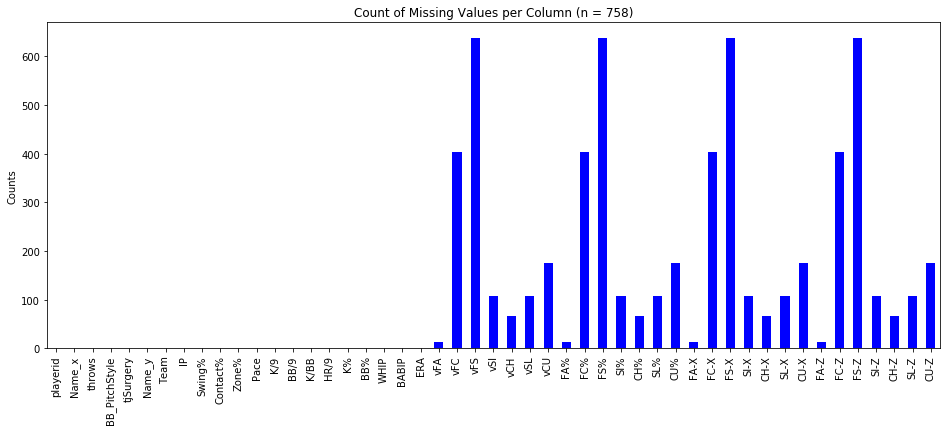

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

df.isna().sum().plot.bar(figsize=(16,6), color='blue')
plt.title('Count of Missing Values per Column (n = 758)')
plt.ylabel('Counts')
plt.show()

The missing data corresponds to velocity, percentage, and movement of pitches that a particular pitcher does not throw so we will fill with 0.

In [23]:
df = df.fillna(0)

When performing analysis on text data it is always a good idea to check for duplicate entries for fields that should be unique identifiers (playerid) and dropping rows that do not have any text.

In [24]:
# Check for duplicates in playerid
print('Any Duplicate PlayerIDs? {}'.format(any(df['playerid'].duplicated())))

Any Duplicate PlayerIDs? False


### Let's transition to looking at pitch style description and some basic metrics

In [25]:
document_lengths = np.array(list(map(len, df.BB_PitchStyle.str.split(' '))))

print("The average number of words in a pitch style description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a pitch style description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a pitch style description is: {}.".format(max(document_lengths)))

The average number of words in a pitch style description is: 209.33905013192611.
The minimum number of words in a pitch style description is: 101.
The maximum number of words in a pitch style description is: 353.


Let's take a look at the distribution of pitch style descriptions by whether or not a pitcher got Tommy John Surgery.

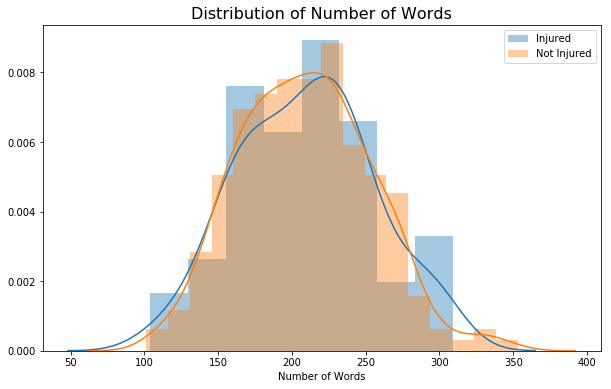

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[df.tjSurgery == 'Yes'], ax=ax, label='Injured')
sns.distplot(document_lengths[df.tjSurgery == 'No'], ax=ax, label='Not Injured')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

### Pre-Process Text and Build Vector Representation

Convert raw text to document-term matrix.

In [27]:
# Function to preprocess raw test from job description
def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
df['BB_PitchStyle_Clean'] = df['BB_PitchStyle'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
df['BB_PitchStyle_Clean'] = df['BB_PitchStyle_Clean'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
df['BB_PitchStyle_Clean'] = df['BB_PitchStyle_Clean'].str.lower()

# Lemmatize
df['BB_PitchStyle_Clean'] = df['BB_PitchStyle_Clean'].map(lambda x: lemmatize(x))

Let's look at the pitch style description before and after cleaning.

In [28]:
player = 'Clayton Kershaw'
print('Original Text: \n{}\n'.format(list(df[df.Name_x == player]["BB_PitchStyle"])))
print('After Cleaning: \n{}'.format(list(df[df.Name_x == player]["BB_PitchStyle_Clean"])))

Original Text: 
["Clayton Kershaw has thrown 34,601 pitches that have been tracked by the PITCHf/x system between 2007 and 2019, including pitches thrown in the MLB Regular Season, the MLB Postseason and Spring Training. In 2019, he has relied primarily on his Slider (87mph) and Fourseam Fastball (90mph), also mixing in a Curve (74mph).BETA Feature:Basic description of 2019 pitches compared to other LHP:His slider  is thrown extremely hard, has much less depth than expected and results in many more groundballs compared to other pitchers' sliders. His fourseam fastball generates an extremely high number of swings & misses compared to other pitchers' fourseamers, is straight as an arrow, has essentially average velo and has some added backspin. His curve  has an exceptional bite, generates a high number of swings & misses compared to other pitchers' curves, is an extreme flyball pitch compared to other pitchers' curves, has primarily 12-6 movement and has slightly below average velo. \r\

### Let's build a Document Term Matrix for use in building our LDA topic model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words.extend(['mph','beta','feature'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(df.BB_PitchStyle_Clean)
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (758, 1099)


Look at top 50 most frequent words in the pitch style descriptions.

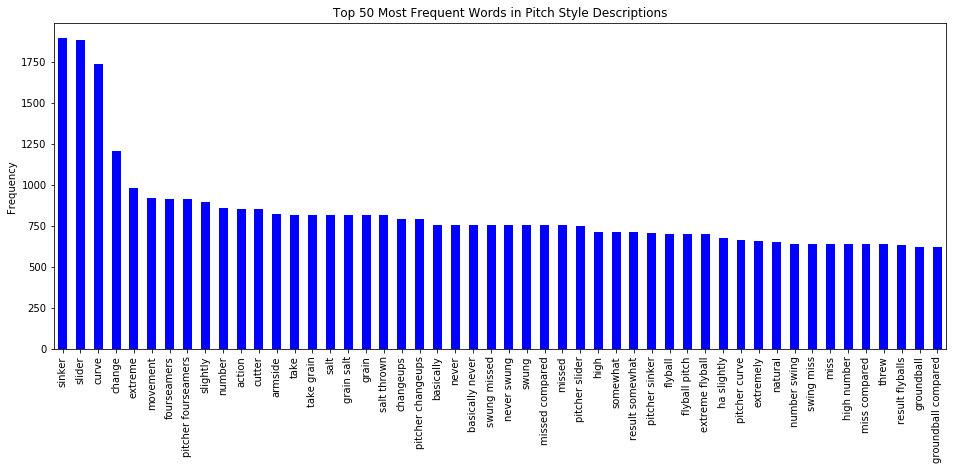

In [30]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Pitch Style Descriptions")
plt.ylabel("Frequency")
plt.show()

### Build the Topic Model

We have everything required to train the LDA model. In addition to the document term matrix, you need to provide:
- the number of topics

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=10, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

### View the topics with pyLDAvis

The above LDA model is built with 10 topics where each topic is a combination of keywords and each keyword contributes a certain weight to the topic. You can see the keywords for each topic and the importance of each keyword using lda_model.print_topics() as shown next.

![](images/Inferring-Topic-from-Keywords.png)

In [32]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.023734 -0.055327       1        1  18.653345
3      0.086909  0.069246       2        1  17.584811
5     -0.060883 -0.094303       3        1  10.986512
1      0.015036 -0.020045       4        1  10.477943
2      0.152889  0.056283       5        1  10.288857
6      0.091878  0.050370       6        1   9.573328
8      0.016378 -0.113872       7        1   9.328398
9      0.173731  0.112148       8        1   8.408911
7     -0.128236 -0.230319       9        1   2.537926
0     -0.323969  0.225818      10        1   2.159968, topic_info=     Category         Freq                 Term        Total  loglift  logprob
term                                                                          
172   Default  1718.000000                curve  1718.000000  30.0000  30.0000
208   Default   836.000000               cutter   836.000000  29.0000  29.0000
900   Default   321.000000             splitter   321.000000  28.0000  28.0000
953   Default   810.000000                 take   810.000000  27.0000  27.0000
380   Default   810.000000           grain salt   810.000000  26.0000  26.0000
783   Default   810.000000                 salt   810.000000  25.0000  25.0000
954   Default   810.000000           take grain   810.000000  24.0000  24.0000
379   Default   810.000000                grain   810.000000  23.0000  23.0000
784   Default   810.000000          salt thrown   810.000000  22.0000  22.0000
587   Default   845.000000               number   845.000000  21.0000  21.0000
850   Default  1869.000000               slider  1869.000000  20.0000  20.0000
543   Default   636.000000        miss compared   636.000000  19.0000  19.0000
452   Default   636.000000          high number   636.000000  18.0000  18.0000
942   Default   636.000000           swing miss   636.000000  17.0000  17.0000
589   Default   636.000000         number swing   636.000000  16.0000  16.0000
542   Default   636.000000                 miss   636.000000  15.0000  15.0000
285   Default   646.000000            extremely   646.000000  14.0000  14.0000
450   Default   711.000000                 high   711.000000  13.0000  13.0000
287   Default   456.000000       extremely high   456.000000  12.0000  12.0000
367   Default   456.000000  generates extremely   456.000000  11.0000  11.0000
683   Default   354.000000       pitcher cutter   354.000000  10.0000  10.0000
1030  Default   151.000000                using   151.000000   9.0000   9.0000
388   Default   151.000000                 grip   151.000000   8.0000   8.0000
687   Default   136.000000     pitcher splitter   136.000000   7.0000   7.0000
682   Default   661.000000        pitcher curve   661.000000   6.0000   6.0000
280   Default   964.000000              extreme   964.000000   5.0000   5.0000
588   Default   209.000000    number groundball   209.000000   4.0000   4.0000
366   Default   209.000000    generates extreme   209.000000   3.0000   3.0000
491   Default   209.000000     killer generates   209.000000   2.0000   2.0000
1082  Default   209.000000          worm killer   209.000000   1.0000   1.0000
...       ...          ...                  ...          ...      ...      ...
687   Topic10   129.197006     pitcher splitter   136.203678   3.7823  -2.8784
570   Topic10    15.530975    movement splitter    16.418766   3.7795  -4.9969
966   Topic10    10.703802       threw splitter    11.595550   3.7551  -5.3692
325   Topic10    22.127987    fastball splitter    24.167428   3.7469  -4.6429
913   Topic10    12.192659      splitter result    13.535374   3.7306  -5.2389
930   Topic10     6.849084     suggests extreme     7.736781   3.7132  -5.8156
907   Topic10    22.163034     splitter extreme    25.158104   3.7083  -4.6413
911   Topic10     8.475085        splitter much     9.674598   3.7027  -5.6026
917   Topic10    26.335230        splitter take    31.982957   3.6408 

### Build a Simple Decision Tree

Remove columns that should not be included in the models prediction.

In [33]:
df1 = df[df.columns.difference(['playerid','Name_x','BB_PitchStyle','Name_y','Team','IP','BB_PitchStyle_Clean','throws'])]
print('Shape of New DataFrame: {}\n'.format(df1.shape))
print('Features to Include in Model: \n{}'.format(list(df1.columns)))

Shape of New DataFrame: (758, 42)

Features to Include in Model: 
['BABIP', 'BB%', 'BB/9', 'CH%', 'CH-X', 'CH-Z', 'CU%', 'CU-X', 'CU-Z', 'Contact%', 'ERA', 'FA%', 'FA-X', 'FA-Z', 'FC%', 'FC-X', 'FC-Z', 'FS%', 'FS-X', 'FS-Z', 'HR/9', 'K%', 'K/9', 'K/BB', 'Pace', 'SI%', 'SI-X', 'SI-Z', 'SL%', 'SL-X', 'SL-Z', 'Swing%', 'WHIP', 'Zone%', 'tjSurgery', 'vCH', 'vCU', 'vFA', 'vFC', 'vFS', 'vSI', 'vSL']


#### Split Full Data Set into Train/Validation Set

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Set seed for random number generator for reproducibility
seed=5

# Split dataframe into features and labels
features = df1.loc[:, df1.columns != 'tjSurgery']
labels = df1['tjSurgery']

# Split data using 80% to train model and 20% to validate performance
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, labels, test_size = 0.2, random_state = seed)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train1.shape))
print('Shape of Train Labels:   {}'.format(y_train1.shape))
print('Shape of Test Features:  {}'.format(X_test1.shape))
print('Shape of Test Labels:    {}'.format(y_test1.shape))

Shape of Train Features: (606, 41)
Shape of Train Labels:   (606,)
Shape of Test Features:  (152, 41)
Shape of Test Labels:    (152,)


### Build a Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree 
dtree1 = DecisionTreeClassifier(class_weight='balanced', random_state=seed)
dtree1.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

#### Get top_n Feature Importances from Decision Tree

The importance of a feature in our Decision Tree is computed as the (normalized) total reduction of the criterion brought by that feature and is also known as the Gini importance. 

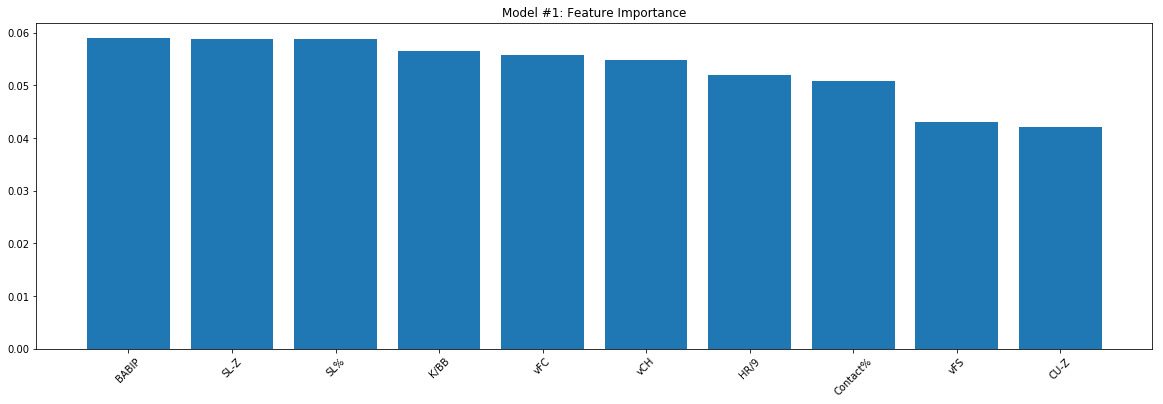

In [36]:
top_n = 10
feat_imp1 = pd.DataFrame({'Importance': dtree1.feature_importances_})    
feat_imp1['Feature'] = X_train1.columns
feat_imp1.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp1 = feat_imp1.iloc[:top_n]

# Plot Feature Importance Values
plt.figure(figsize=(20,6))
plt.bar(feat_imp1['Feature'], feat_imp1['Importance'])
plt.xticks(rotation=45)
plt.title('Model #1: Feature Importance')
plt.show()

C:\Users\bruno\AppData\Local\Continuum\anaconda3\lib\site-packages\scikitplot\plotters.py:37: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  DeprecationWarning)


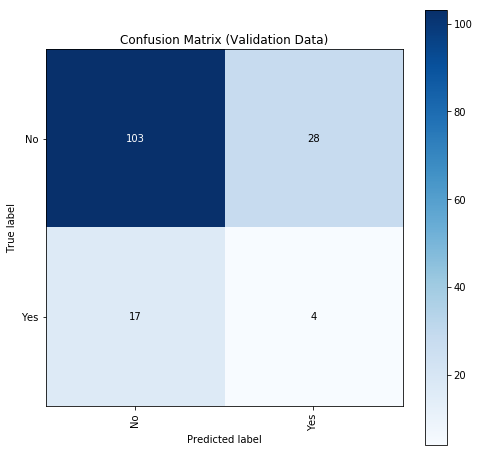

In [37]:
import scikitplot as skplt

# Make predictions on validation data
test_predictions1 = dtree1.predict(X_test1)

# Plot Confusion Matrix on Validation Data
skplt.metrics.plot_confusion_matrix(y_test1, test_predictions1, 
                                    figsize=(8,8),
                                    x_tick_rotation=90,
                                    title='Confusion Matrix (Validation Data)',
                                    normalize=False)
plt.show()

In [38]:
from sklearn.metrics import classification_report, accuracy_score

m1_acc = accuracy_score(y_test1, test_predictions1)*100

print('Model #1: Validation Accuracy: {0:.2f}%\n'.format(m1_acc))
print(classification_report(y_test1, test_predictions1, target_names=['Not Injured', 'Injured']))

Model #1: Validation Accuracy: 70.39%

              precision    recall  f1-score   support

 Not Injured       0.86      0.79      0.82       131
     Injured       0.12      0.19      0.15        21

   micro avg       0.70      0.70      0.70       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.76      0.70      0.73       152



### Let's build the same Decision Tree Model as above and add the topic distributions for each pitcher

In [39]:
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([df1, topic_df], axis=1)
print(f'Original Dataframe Shape: {df1.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (758, 42)
New Dataframe Shape: (758, 52)



,BABIP,BB%,BB/9,CH%,CH-X,CH-Z,CU%,CU-X,CU-Z,Contact%,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,-0.20,-0.074766,-0.219626,-0.220264,-0.071429,-2.464286,0.000,0.000000,0.000000,-1.351598,...,0.000658,0.483405,0.206436,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.305553
1,0.04,0.785047,0.612150,0.000000,0.000000,0.000000,-0.592,-0.222222,-0.194444,-2.063927,...,0.001031,0.188991,0.001031,0.001031,0.389963,0.001031,0.001031,0.001031,0.181563,0.233297
2,1.72,0.710280,0.677570,0.528634,-0.007143,0.714286,-0.632,0.126984,0.083333,-0.968037,...,0.000877,0.105127,0.000877,0.521289,0.000877,0.000877,0.268216,0.100104,0.000877,0.000877
3,0.80,0.822430,0.677570,-0.740088,-0.135714,0.178571,1.440,0.253968,-1.027778,-1.004566,...,0.001220,0.001220,0.001220,0.001220,0.283638,0.001220,0.001220,0.259079,0.001220,0.448745
4,0.28,0.299065,0.275701,-0.449339,-0.014286,-0.785714,-0.144,0.222222,-0.250000,0.182648,...,0.000541,0.000541,0.000541,0.000541,0.000541,0.000541,0.148874,0.000541,0.846801,0.000541


Perform train test split for the new data

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
features = df2.loc[:, df2.columns != 'tjSurgery']
labels = df2['tjSurgery']

# Split data using 80% to train model and 20% to validate performance
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size = 0.2, random_state = seed)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train2.shape))
print('Shape of Train Labels:   {}'.format(y_train2.shape))
print('Shape of Test Features:  {}'.format(X_test2.shape))
print('Shape of Test Labels:    {}'.format(y_test2.shape))

Shape of Train Features: (606, 51)
Shape of Train Labels:   (606,)
Shape of Test Features:  (152, 51)
Shape of Test Labels:    (152,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

dtree2 = DecisionTreeClassifier(class_weight='balanced', random_state=seed)
dtree2.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

#### Compare Feature Importance for Model #1 (Numerical-only) and Model #2 (Numerical + LDA)

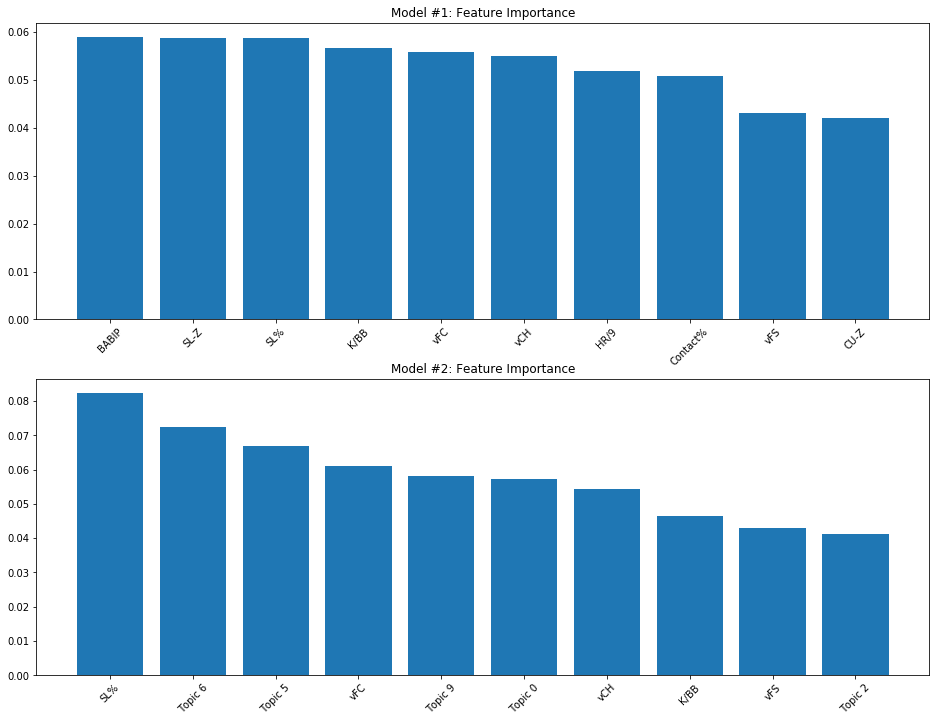

In [42]:
# Get top_n feature importances from decision tree
top_n = 10
feat_imp2 = pd.DataFrame({'Importance': dtree2.feature_importances_})    
feat_imp2['Feature'] = X_train2.columns
feat_imp2.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp2 = feat_imp2.iloc[:top_n]

# Plot Feature Importance Values
plt.figure(figsize=(16,12))

# Plot the feature importance for Model #1
plt.subplot(2, 1, 1)
plt.bar(feat_imp1['Feature'], feat_imp1['Importance'])
plt.xticks(rotation=45)
plt.title('Model #1: Feature Importance')

# Plot the feature importance for Model #2
plt.subplot(2, 1, 2)
plt.bar(feat_imp2['Feature'], feat_imp2['Importance'])
plt.xticks(rotation=45)
plt.title('Model #2: Feature Importance')
plt.show()

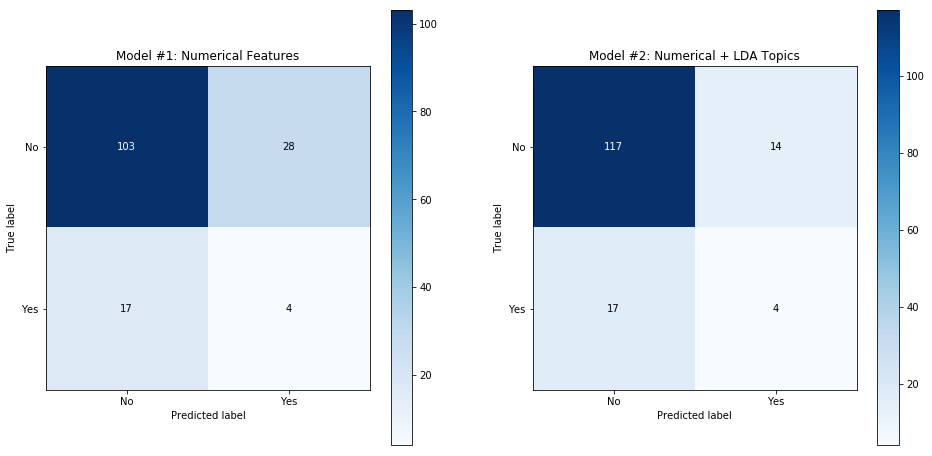

In [43]:
# Make predictions with model 2 on validation data
test_predictions2 = dtree2.predict(X_test2)

plt.figure(figsize=(16,8))

# Re-Plot Confusion Matrix on Validation Data for Model #1 (for comparison)
plot1 = skplt.metrics.plot_confusion_matrix(y_test1, test_predictions1, 
                                            figsize=(8,8),
                                            title='Model #1: Numerical Features',
                                            normalize=False,
                                            ax = plt.subplot(1, 2, 1))

# Plot Confusion Matrix on Validation Data for Model #2
plot2 = skplt.metrics.plot_confusion_matrix(y_test2, test_predictions2, 
                                            figsize=(8,8),
                                            title='Model #2: Numerical + LDA Topics',
                                            normalize=False,
                                            ax = plt.subplot(1, 2, 2))

In [44]:
m2_acc = accuracy_score(y_test2, test_predictions2)*100

target_names = ['Not Injured','Injured']
print('Model #2: Overall Accuracy: {0:.2f}%'.format(m2_acc))
print('Improvement over Model #1:   {0:.2f}%\n'.format(m2_acc - m1_acc))
print('Model #1 (Numerical Features Only):')
print(classification_report(y_test1, test_predictions1, target_names=target_names))
print('Model #2 (Numerical Features + LDA Topics):')
print(classification_report(y_test2, test_predictions2, target_names=target_names))

Model #2: Overall Accuracy: 79.61%
Improvement over Model #1:   9.21%

Model #1 (Numerical Features Only):
              precision    recall  f1-score   support

 Not Injured       0.86      0.79      0.82       131
     Injured       0.12      0.19      0.15        21

   micro avg       0.70      0.70      0.70       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.76      0.70      0.73       152

Model #2 (Numerical Features + LDA Topics):
              precision    recall  f1-score   support

 Not Injured       0.87      0.89      0.88       131
     Injured       0.22      0.19      0.21        21

   micro avg       0.80      0.80      0.80       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.78      0.80      0.79       152



# 3. Next Steps

- Implement technique to identify the optimal number of topics for LDA model and assess impact
- Try different sampling techniques (up, down, SMOTE, etc.) and understand performance impacts
- Download Lahman database master table and identify which players are still active. Use the Master table to find the pitchers that ended their career with no injury.
- 